In [1]:
cd "nilm data\ukdale"

D:\jjenko\nilm data\ukdale


 Volume in drive D is Data
 Volume Serial Number is 3607-76B7

 Directory of D:\jjenko\nilm data\ukdale

08.03.2021  16:41    <DIR>          .
08.03.2021  16:41    <DIR>          ..
17.02.2021  15:30    <DIR>          .ipynb_checkpoints
08.03.2021  11:23            77.942 gasf.jpg
17.02.2021  19:54             4.956 ukdale parser.ipynb
05.03.2021  10:22     6.330.578.146 ukdale.h5
               3 File(s)  6.330.661.044 bytes
               3 Dir(s)  2.746.095.599.616 bytes free


In [2]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('ggplot')
rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,30))

ukdale = DataSet('ukdale.h5')
ukdale.set_window(start='2013-1-7T0920',end='2013-1-8T1800')


<Figure size 720x2160 with 0 Axes>

2013-01-07 12:50:35+00:00     94.0
2013-01-07 12:50:41+00:00     94.0
2013-01-07 12:50:47+00:00     94.0
2013-01-07 12:50:53+00:00     94.0
2013-01-07 12:51:00+00:00     93.0
2013-01-07 12:51:06+00:00     93.0
2013-01-07 12:51:12+00:00     94.0
2013-01-07 12:51:18+00:00     94.0
2013-01-07 12:51:24+00:00     93.0
2013-01-07 12:51:30+00:00     94.0
2013-01-07 12:51:37+00:00     93.0
2013-01-07 12:51:43+00:00     93.0
2013-01-07 12:51:49+00:00     93.0
2013-01-07 12:51:55+00:00     92.0
2013-01-07 12:52:01+00:00     93.0
2013-01-07 12:52:07+00:00     92.0
2013-01-07 12:52:14+00:00     92.0
2013-01-07 12:52:20+00:00     91.0
2013-01-07 12:52:26+00:00     92.0
2013-01-07 12:52:32+00:00     92.0
2013-01-07 12:52:38+00:00     91.0
2013-01-07 12:52:45+00:00     91.0
2013-01-07 12:52:51+00:00     90.0
2013-01-07 12:52:57+00:00     90.0
2013-01-07 12:53:03+00:00     90.0
2013-01-07 12:53:09+00:00     90.0
2013-01-07 12:53:15+00:00     91.0
2013-01-07 12:53:21+00:00     90.0
2013-01-07 12:53:27+

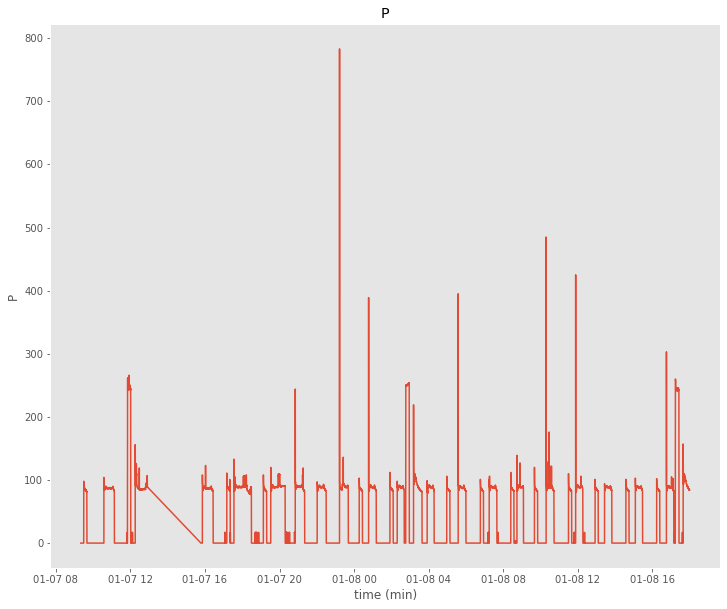

In [5]:
elec = ukdale.buildings[1].elec
fridge = elec['fridge']
fridge.available_columns()
df = next(fridge.load(physical_quantity='power'))

fig, ax = plt.subplots()
ax.plot(df)
ax.set(xlabel='time (min)', ylabel='P', title='P')
ax.grid()

df.power.active[1900:1950]

In [91]:
#cell is responsible for storing and handling with hdf5 data
import h5py

#if file does not exist create new one
file_name = "UKDALE_GAF_1h"
#file = h5py.File("D:/jjenko/nilm data/GAF_DS/"f"{file_name}"".hdf5", "w")
    

def create_hdf5_group(group_name): #groups are appliances such as fridge or toaster
    file = h5py.File("D:/jjenko/nilm data/GAF_DS/"f"{file_name}"".hdf5", "a")
    dataset = file.create_group(f"{group_name}")
    file.close()


def store_single_hdf5(image, image_id, group_name): 
    """
    Stores single image to HDF5
    """     
    file = h5py.File("D:/jjenko/nilm data/GAF_DS/"f"{file_name}"".hdf5", "a")
    group = file[f"{group_name}"]
    
    # Create a dataset in the file
    #"image", np.shape(image), h5py.h5t.STD_U8BE, data=image -> def guts
    dataset = g.create_dataset(f"{image_id}",np.shape(image))
        
   
    file.close()

def store_many_hdf5(images,group_name,image_set_name):
    """
    Stores multiple images to HDF5
    """     
    num_images = len(images)
    
    # read HDF5 file
    file = h5py.File("D:/jjenko/nilm data/GAF_DS/"f"{file_name}"".hdf5", "a")
    # open specified group
    group = file[f"{group_name}"]

    #check if ds already exists, then prompt user
    for name in group:
        if str(name) == str(image_set_name):
            print("Dataset '"f"{name}" "' already exists in " f"{file_name}""/"f"{group_name}")
            
            ans = input("Do you want to replace existing dataset? (y,n) Press enter to contine")
                
            if ans == "y":
                print("  removed "f"{name}""!")   
                del group[name]
            else:
                print("  quiting! ") 
                raise

    # Create a dataset in the group       
    print("storing... images to store: "f"{num_images}")
    dataset = group.create_dataset(f"{image_set_name}", np.shape(images), h5py.h5t.IEEE_F32LE , data=images)
   
    file.close()
    print("finshed. stored to " f"{file_name}""/"f"{group_name}""/"f"{image_set_name}")


def read_many_hdf5(group_name,image_set_name):
    """ 
    Reads image from HDF5.

    """
    images = []


    # Open the HDF5 file
    file = h5py.File("D:/jjenko/nilm data/GAF_DS/"f"{file_name}"".hdf5", "r+")

    images = np.array(file[f"{group_name}""/"f"{image_set_name}"])

    return images

In [7]:
#create new ds inside
#create_hdf5_group("fridge")
#store_many_hdf5(gasf_stack,"fridge","gasf")


In [104]:
#next 3 cells generate GAFs on based on manual selecont of interval
#select time range and period
step_in_hrs = 1
date_range = pd.date_range("2013-1-7T0000", "2013-1-29T0600",freq=''+str(step_in_hrs)+'h')
#print(date_range)

In [9]:
#(debug)graph first portion of the seleted range
# n = 18
# ukdale.set_window(start=date_range[n],end=date_range[n+1])
# elec = ukdale.buildings[1].elec
# fridge = elec['fridge']
# fridge.available_columns()
# df = next(fridge.load(physical_quantity='power'))
# print(len(df))
# fig, ax = plt.subplots()
# ax.plot(df)
# ax.set(xlabel='time (min)', ylabel='P', title='P')
# ax.grid()


In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
import numpy as np
import h5py

#define some of the paramteres mainly for creating stack of images
N_of_dates = len(date_range)-2
#create 3D empty array to stack images into
gasf_stack = np.empty([0,300,300])# -> change size to match GAF image size
gadf_stack = np.empty([0,300,300])# -> change size to match GAF image size


manualy_selected_appliances = [computer, computer monitor, laptop computer, televison, washer dryer, coffee maker, microwave ]

for interval in range(N_of_dates):

    ukdale.set_window(start=date_range[interval],end=date_range[interval+1])
    
    #read from dataset
    elec = ukdale.buildings[1].elec
    fridge = elec['fridge']
    fridge.available_columns()
    df = next(fridge.load(physical_quantity='power'))

    #do some metric calcs in order to determine if selected window needs to be dropped
    metric = (3600*step_in_hrs)/6 #will adjust automaticly
    if len(df) <= 0.8*metric:# -> manulay select %
        print("skipped iteration: "+str(date_range[interval])+" had only "+str(len(df))+" out of "+str(metric)+" points ("+str(int(100*(len(df))/metric))+"%)")
        continue 
        
    #do some reshaping to satisfy GAF library
    S = df.fillna(0).to_numpy().reshape(1,-1)
    Ssmall= S[0,0:S.size]
    S2d = np.reshape(Ssmall, (1, S.size))

    # Transform the time series into Gramian Angular Fields
    gasf = GramianAngularField(image_size=300, method='summation')
    X_gasf = gasf.fit_transform(S2d)
    gadf = GramianAngularField(image_size=300, method='difference')
    X_gadf = gadf.fit_transform(S2d)

    # Show the images for the first time series
    # fig = plt.figure(figsize=(8, 4))
    
    #gasf_stack[i][:][:] = X_gasf[0]

    gasf_stack = np.append(gasf_stack,X_gasf,axis=0)
    gadf_stack = np.append(gadf_stack,X_gadf,axis=0)


    #fig, ax = plt.subplots()
    #images = [X_gasf[0], X_gadf[0]]
    
    
    # ax.imshow(X_gasf[0], cmap='rainbow')
    # plt.savefig("gasf.jpg")

    # uncomment for def display of images
    # grid = ImageGrid(fig, 111,
    #                 nrows_ncols=(1, 1),
    #                 axes_pad=0.15,
    #                 share_all=True,
    #                 # cbar_location="right",
    #                 # cbar_mode="single",
    #                 # cbar_size="7%",
    #                 # cbar_pad=0.3,
    #                 )

    # titles = ['Summation', 'Difference']
    # for image, title, ax in zip(images, titles, grid):
    #     im = ax.imshow(image, cmap='rainbow', origin='lower')
    #     ax.set_title(title, fontdict={'fontsize': 12})
    # ax.cax.colorbar(im)
    # ax.cax.toggle_label(False)
    # plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
    # plt.show()
    # plt.savefig("gasf.jpg"
print("\n")
print("number of images (per dataset) stacked: "f"{gasf_stack.shape[0]}"" out of all possible " f"{N_of_dates}" " ("f"{int(100*gasf_stack.shape[0]/N_of_dates)}""%)")
   

skipped iteration: 2013-01-07 11:00:00 had only 436 out of 600.0 points (72%)
skipped iteration: 2013-01-07 13:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-07 14:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-07 15:00:00 had only 132 out of 600.0 points (22%)
skipped iteration: 2013-01-10 11:00:00 had only 310 out of 600.0 points (51%)
skipped iteration: 2013-01-10 12:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-10 13:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-10 14:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-10 15:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-10 16:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-10 17:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-10 18:00:00 had only 0 out of 600.0 points (0%)
skipped iteration: 2013-01-10 19:00:00 had only 0 out of 600.0 points (0%)
skipped iteratio

-0.9137141258843868

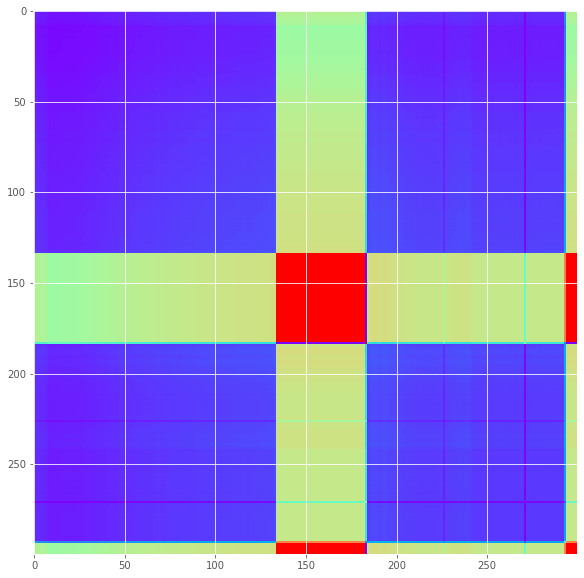

In [111]:
# Show image to be saved
fig, ax = plt.subplots()
ax.imshow(gasf_stack[129], cmap='rainbow')
gasf_stack[129][50][50]

In [107]:
#store images generated above
store_many_hdf5(gasf_stack,"fridge","gasf")

Dataset 'gasf' already exists in UKDALE_GAF_1h/fridge
  removed gasf!
storing... images to store: 327
finshed. stored to UKDALE_GAF_1h/fridge/gasf


In [108]:
#retrieve stored images
ret_img_stack = read_many_hdf5("fridge","gasf")
ret_img_stack.shape


(327, 300, 300)

-0.9137141

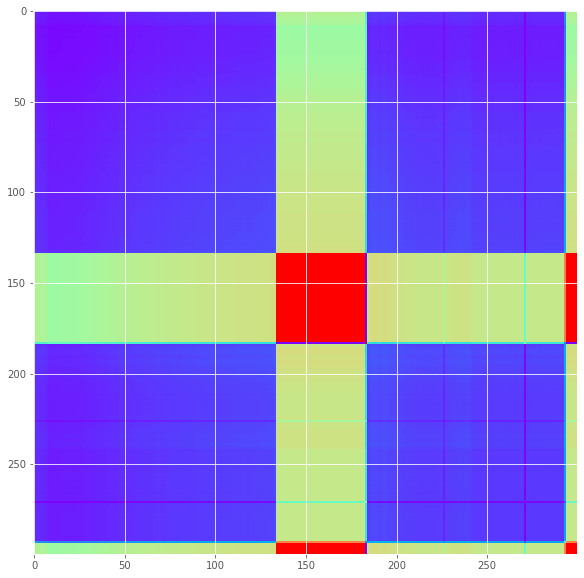

In [112]:
# Show retrieved image
fig, ax = plt.subplots()
ax.imshow(ret_img_stack[129], cmap='rainbow')
ret_img_stack[129][50][50]

In [171]:
appl = elec.appliances
num_of_appliances = len(appl)

manualy_selected_appliances = ["computer", "computer monitor", "laptop computer", "televison", "washer dryer", "coffee maker", "microwave" ]

for appliance in manualy_selected_appliances:
 print(appliance)
 elec

for i in range(num_of_appliances):
    appl[i] = appl[i].type["type"]
    #print(appl[i])

computer
computer monitor
laptop computer
televison
washer dryer
coffee maker
microwave
